Estas gráficas son a realizar sobre el trabajo del tema anterior.

Se debe realizar

1. Gráficas con matplotlib (bien hechas, con título, ejes, etc...)
2. Versión equivalente con Seaborn.

# Gráfica 1

Histórico/evolución de medallas ganadas por España en cada año en un gráfico de línea

* Partiendo del DataFrame **medallas_paises**, columna añadida "total" que sea la suma de las medallas de oro, plata y bronce
* Quédate son los datos solamente de españa en un DF **spain**.
* El DataFrame ya debe estar ordenado por año, por lo que se puede hacer un plot directamente.  
* Si no estuviese ordenado habría que ordenar primero por año, para que la línea no vaya dando saltos
* El eje x es el año 
* El eje y el total de medallas en cada año.

El resultado debe ser como en la imagen, añadiendo nombres a ejes y título de la gráfica.

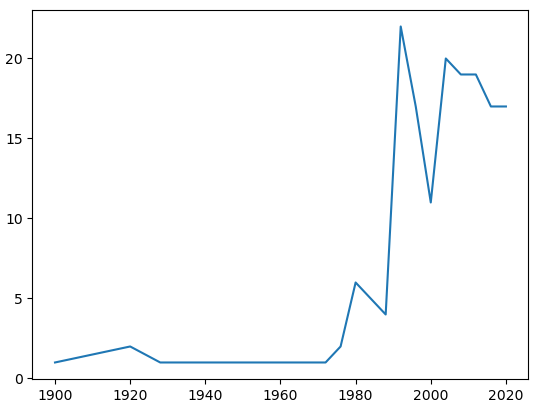

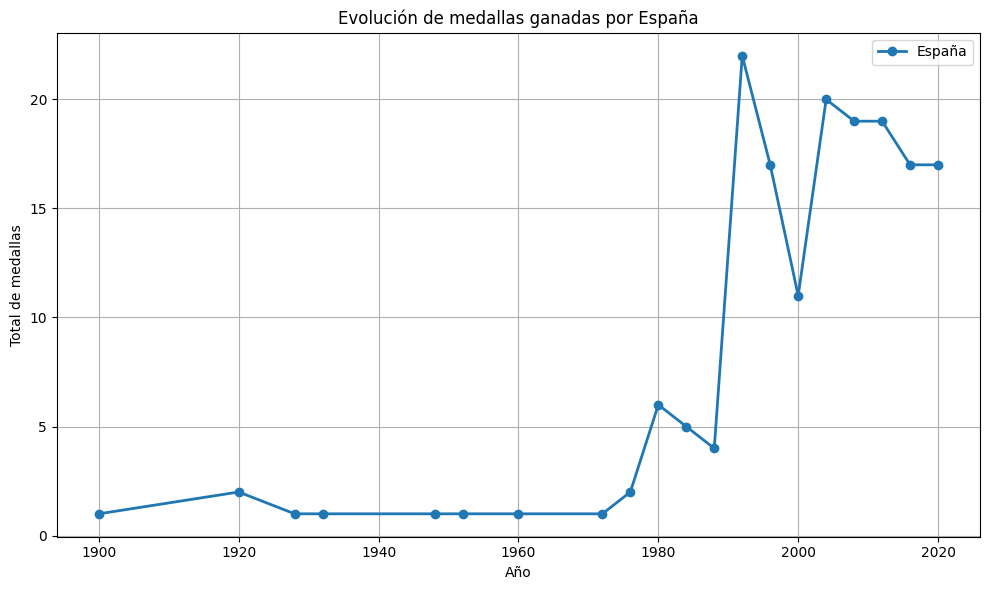

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el CSV
medallas_paises = pd.read_csv('medallas_jjoo.csv')

# Crear la columna 'total' sumando oro, plata y bronce
medallas_paises['total'] = (
    medallas_paises['Gold'] +
    medallas_paises['Silver'] +
    medallas_paises['Bronze']
)

# Filtrar los datos solo de España
spain = medallas_paises[medallas_paises['Country_Name'] == 'Spain']

# Crear el gráfico de línea
plt.figure(figsize=(10, 6))

plt.plot(
    spain['Year'],      # Eje X: año
    spain['total'],     # Eje Y: total de medallas
    marker='o',
    linewidth=2,
    label='España'
)

# Títulos y etiquetas
plt.title('Evolución de medallas ganadas por España')
plt.xlabel('Año')
plt.ylabel('Total de medallas')

# Leyenda y rejilla
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# Gráfica 2

Agrupa por continente y muestra en un gráfico de tartas la distribución del total de medallas por continente de toda la historia. Para ello debes:

* Agrupar por continente y sumar las medallas totales, guardar el agrupamiento en **'total_continente'**
* Se hace un plot de tartas con el total de medallas por contienente
* 'total_continente' es una Serie, el atributo index son los nombres de los continentes, el atributo values son los datos
* En el gráfico se debe ver el % de medallas.

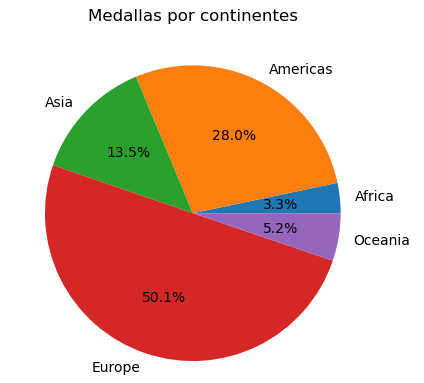

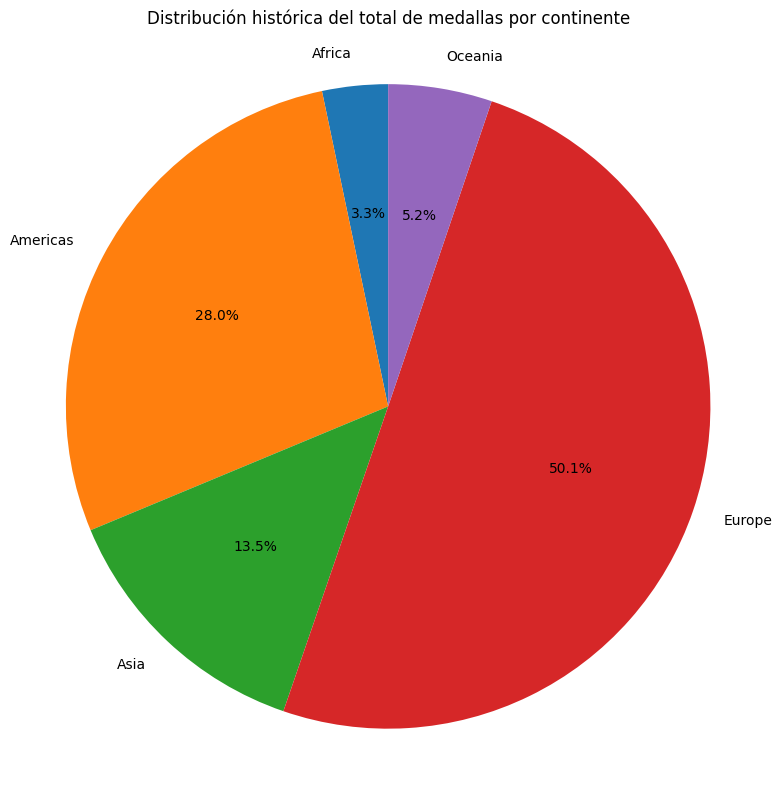

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los CSV
medallas = pd.read_csv("medallas_jjoo.csv")
medallas = medallas.drop(columns=['Country_Code'])
medallas.columns = ['año', 'host_pais', 'host_ciudad', 'pais', 'oro', 'plata', 'bronce']
paises = pd.read_csv("paises.csv")

# Unión interna entre medallas y países
medallas_paises = pd.merge(
    medallas,
    paises,
    on='pais',
    how='inner'
)

# Crear la columna total de medallas
medallas_paises['total'] = (
    medallas_paises['oro'] +
    medallas_paises['plata'] +
    medallas_paises['bronce']
)

# Agrupar por continente y sumar el total de medallas
# El resultado es una Serie
total_continente = medallas_paises.groupby('continente')['total'].sum()

# Crear el gráfico de tartas
plt.figure(figsize=(8, 8))

plt.pie(
    total_continente.values,        # Valores numéricos
    labels=total_continente.index,  # Continentes
    autopct='%1.1f%%',              # Porcentaje visible
    startangle=90
)

# Título
plt.title('Distribución histórica del total de medallas por continente')

# Asegura forma circular
plt.axis('equal')

plt.tight_layout()
plt.show()


# Gráfica 3

### Medallas ganadas por España en cada década

A partir del DF **spain**, agrupa las medallas de españa por década y muestra en un gráfico de barras la evolución de medallas totales por década.

Para ello debes hacer:

* Podemos usar cut para discretizar la columna año a  intervalos por décadas, creando una nueva columna **década** en el DF **spain**
* Al hacer cut, los bins (cortes para discretizar) serán los años [1960, 1970, 1980, 1990, 2000, 2010, 2020]
* Las labels serán string que indican cada década ['60s', '70s', '80s', '90s', '00s', '10s']
* Posteriormente, se agrupa por década y se suman las medallas totales, guardando en un nuevo dataframe espana_decadas

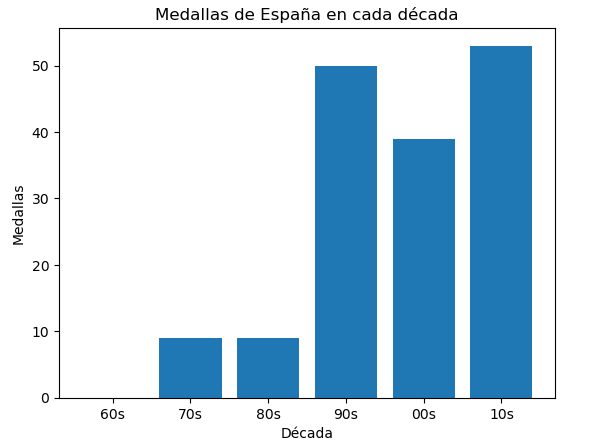


/tmp/ipykernel_20747/3058259124.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('decada', as_index=False)['total']


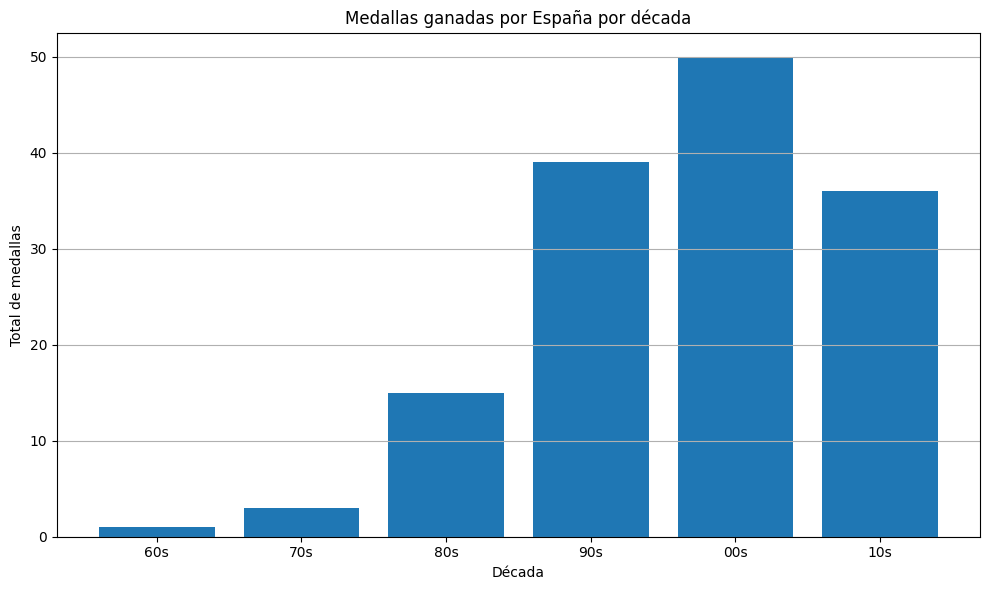

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Discretizar la columna Year en décadas usando cut
spain['decada'] = pd.cut(
    spain['Year'],
    bins=[1960, 1970, 1980, 1990, 2000, 2010, 2020],
    labels=['60s', '70s', '80s', '90s', '00s', '10s'],
    right=False   # El intervalo incluye el límite izquierdo
)

# Agrupar por década y sumar el total de medallas
espana_decadas = (
    spain
    .groupby('decada', as_index=False)['total']
    .sum()
)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))

plt.bar(
    espana_decadas['decada'],   # Eje X: décadas
    espana_decadas['total']     # Eje Y: total de medallas
)

# Títulos y etiquetas
plt.title('Medallas ganadas por España por década')
plt.xlabel('Década')
plt.ylabel('Total de medallas')

# Rejilla solo en el eje Y (mejor para barras)
plt.grid(axis='y')

plt.tight_layout()
plt.show()
